# Grafica de la variacion del ancho de banda respecto al tiempo

## Caracteristicas del experimento ##
1. Tasas de datos empleadas para cada ataque: 2kps, 4kps, 6kps, 8kps, 10kps.
2. Se lleva a cabo un caso normal en el cual no se lleva a cabo ningun ataque.
3. Para este caso se emplea solo una replica, es decir, los datos recolectados son los correspondientes a un solo experimento llevado a cabo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

metricas = {'iperf':{},'ping':{}}

baseDir = './csv_50_1/'
files = os.listdir(baseDir)
for e in files:
    k = e.strip('csv')
    k = k.strip('.')
    k = k.split('_')[-1]
    if 'ping' in e:
        metricas['ping'][k] = pd.read_csv(baseDir + e,sep=';')
            
    else:
        metricas['iperf'][k] = pd.read_csv(baseDir + e,sep=';', index_col=0)
        

## Graficas de ancho de banda ##

**Captura de un dataframe para una tasa de 6kpps**

In [ ]:
print(metricas['iperf']['6kpps'])

In [ ]:
bw = metricas['iperf']['6kpps']['Bandwidth [Mbits/sec]']
print(bw)
print(type(bw))

In [ ]:
axes = bw.plot(ylim = [0,120],grid = True, xticks = [0,50//4,50//2,50*3//4,49],title='ATAQUE 6kps')
axes.set_ylabel('Ancho de banda [Mbits/sec]')


**Grafica de los anchos de banda**

dict_keys(['4kpps', '8kpps', '6kpps', '10kpps', 'iperfnormal', '2kpps'])


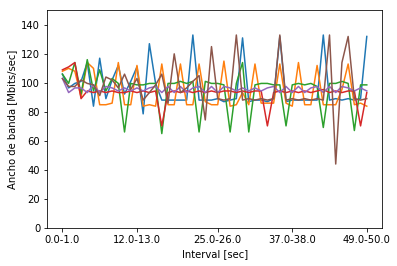

In [7]:
bw = metricas['iperf']
bw_metrics = {}
for k in bw:
    bw_metrics[k] = bw[k]['Bandwidth [Mbits/sec]']

ban = True
for k in bw_metrics:
    if ban:
        axes = bw_metrics[k].plot(ylim = [0,150],grid = True, xticks = [0,50//4,50//2,50*3//4,49])
        
        ban = False 
    else:
        bw_metrics[k].plot(ax=axes)
axes.set_ylabel('Ancho de banda [Mbits/sec]')
indices = bw_metrics.keys()
print(indices)
#axes = bw_metrics.plot(ylim = [0,120],grid = True, xticks = [0,50//4,50//2,50*3//4,49],title='ATAQUE 6kps')
#list = bw_metrics[0]
#axes = bw_metrics.plot(ylim = [0,120],grid = True, xticks = [0,50//4,50//2,50*3//4,49],title='ATAQUE 6kps')

#['6kpps']['Bandwidth [Mbits/sec]']

In [8]:
df_bw = pd.DataFrame(columns=indices)
print(df_bw)

Empty DataFrame
Columns: [4kpps, 8kpps, 6kpps, 10kpps, iperfnormal, 2kpps]
Index: []


In [9]:
for k in df_bw:  
    df_bw[k] = bw_metrics[k]
    #print(df[k])
print(df_bw)
#df1['e'] = Series(np.random.randn(sLength), index=df1.index)

                4kpps  8kpps  6kpps  10kpps  iperfnormal  2kpps
Interval [sec]                                                 
0.0-1.0         106.0  108.0  106.0   109.0        103.0  103.0
1.0-2.0          96.5  110.0   99.6   111.0         93.3   97.5
2.0-3.0          99.6  108.0  114.0   114.0         96.5   97.5
3.0-4.0         101.0   90.2   92.3    89.1         96.5  102.0
4.0-5.0         114.0  114.0  116.0    94.4         93.3   99.6
5.0-6.0          83.9  110.0   94.4    93.3         98.6   98.6
6.0-7.0         117.0   84.9  109.0    94.4         93.3   91.2
7.0-8.0          89.1   84.9   94.4    93.3         97.5  104.0
8.0-9.0         102.0   86.0  103.0    94.4         96.5  102.0
9.0-10.0        112.0  114.0   99.6    93.3         94.4   96.5
10.0-11.0        92.3   84.9   66.1    93.3         96.5  106.0
11.0-12.0       101.0   84.9   99.6    94.4         94.4   95.4
12.0-13.0       111.0  112.0   98.6    93.3         96.5  103.0
13.0-14.0        78.6   83.9   98.6    9

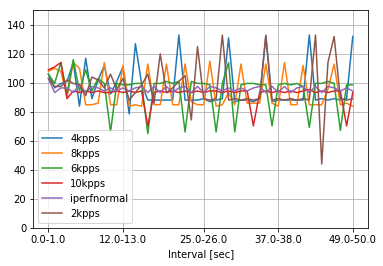

In [10]:
axes = df_bw.plot(ylim = [0,150],grid = True, xticks = [0,50//4,50//2,50*3//4,49])

## Graficas delay ##

In [11]:
#ping_delay = metricas['ping']['6kpps']['time [ms]']
ping_delay = metricas['ping']
delay_metrics = {}
for k in ping_delay:
    delay_metrics[k] = ping_delay[k]['time [ms]']    
#print(delay_metrics)
indices_delay = delay_metrics.keys()
df_delay = pd.DataFrame(columns=indices_delay)

In [12]:
print(df_delay)
for k in df_delay:  
    if k != 'pingnormal':
        df_delay[k] = delay_metrics[k]
    #print(k)
    #print(df_delay[k]) 
    #print(delay_metrics[k])
    #print()

Empty DataFrame
Columns: [4kpps, 8kpps, 6kpps, 10kpps, 2kpps, pingnormal]
Index: []


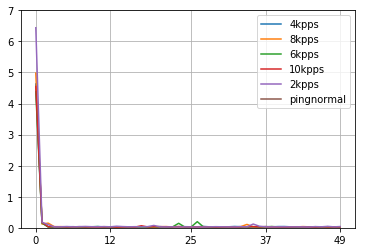

In [16]:
axes = df_delay.plot(ylim = [0,7],grid = True, xticks = [0,50//4,50//2,50*3//4,49])